<a href="https://colab.research.google.com/github/Markl900/my-notebooks/blob/main/Copy_of_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# header

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import *

!pip install scikit-learn
from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


from sklearn import datasets, model_selection, metrics

In [ ]:
import os
from google.colab import userdata

url = "https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv"

office_df = pd.read_csv(url)

# Part 1

In [ ]:
office_df.isnull().sum()

,0
index,0
season,0
episode,0
episode_name,0
director,0
writer,0
character,0
text,377
text_w_direction,5
imdb_rating,0


In [ ]:
office_df = office_df.drop(['text', 'text_w_direction'], axis=1)


In [ ]:
office_df.head()

,index,season,episode,episode_name,director,writer,character,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,7.6,3706,2005-03-24,0.400000,0.000000,1.60


In [ ]:
office_df.groupby(['season', 'episode'])['imdb_rating'].mean().reset_index()

,season,episode,imdb_rating
0,1,1,7.6
1,1,2,8.3
2,1,3,7.9
3,1,4,8.1
4,1,5,8.4
...,...,...,...
181,9,19,8.0
182,9,20,8.0
183,9,21,8.9
184,9,22,9.3


In [ ]:
office_df.groupby(['season', 'episode', 'sentimentr_score'])['imdb_rating'].mean().reset_index()

,season,episode,sentimentr_score,imdb_rating
0,1,1,-0.804984,7.6
1,1,1,-0.750000,7.6
2,1,1,-0.577350,7.6
3,1,1,-0.530330,7.6
4,1,1,-0.500000,7.6
...,...,...,...,...
17051,9,24,1.024797,9.7
17052,9,24,1.050952,9.7
17053,9,24,1.067350,9.7
17054,9,24,1.096016,9.7


In [ ]:
grouped_df = office_df.groupby(['season', 'episode', 'syuzhet_score', 'total_votes'])['imdb_rating'].mean().reset_index()
print(grouped_df.describe())

            season      episode  syuzhet_score  total_votes  imdb_rating
count  8902.000000  8902.000000    8902.000000  8902.000000  8902.000000
mean      5.547405    12.583352       0.593883  2146.717704     8.263300
std       2.388450     7.271082       1.284690   854.307897     0.548999
min       1.000000     1.000000      -5.000000  1393.000000     6.700000
25%       3.000000     6.000000      -0.250000  1616.000000     7.900000
50%       6.000000    12.500000       0.600000  1954.000000     8.200000
75%       8.000000    19.000000       1.400000  2388.000000     8.700000
max       9.000000    28.000000       7.750000  7934.000000     9.700000


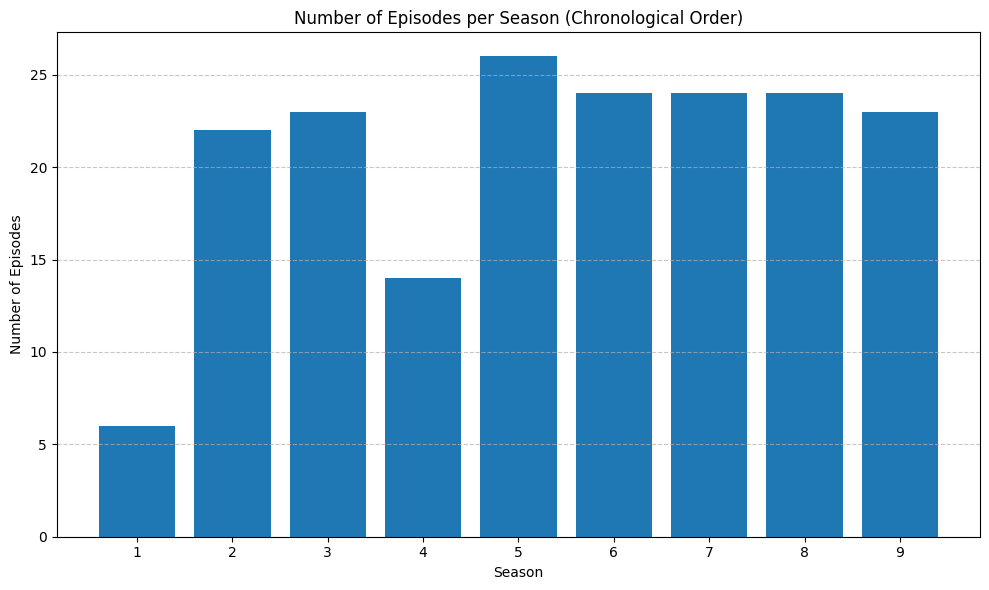

In [ ]:

episode_counts = df.groupby("season")["episode"].nunique().reset_index(name="episode_count")


episode_counts = episode_counts.sort_values(by="season")

# plotting
plt.figure(figsize=(10, 6))
plt.bar(episode_counts["season"].astype(str), episode_counts["episode_count"])
plt.title("Number of Episodes per Season (Chronological Order)")
plt.xlabel("Season")
plt.ylabel("Number of Episodes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



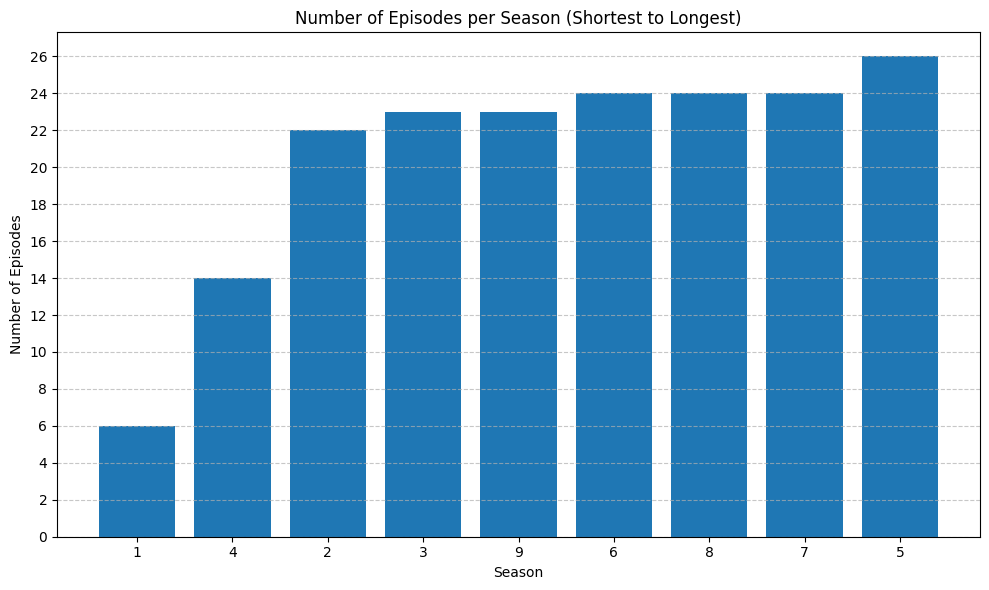

In [ ]:
episode_counts = df.groupby("season")["episode"].nunique().reset_index(name="episode_count")


episode_counts = episode_counts.sort_values(by="episode_count")

# plotting
plt.figure(figsize=(10, 6))
plt.bar(episode_counts["season"].astype(str), episode_counts["episode_count"])
plt.title("Number of Episodes per Season (Shortest to Longest)")
plt.xlabel("Season")
plt.ylabel("Number of Episodes")

max_episodes = episode_counts["episode_count"].max()
plt.yticks(range(0, max_episodes + 2, 2))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:

# group by season and calculate the average IMDb rating
season_ratings = df.groupby("season")["imdb_rating"].mean().reset_index()

# this below gets top 5
top_5_seasons = season_ratings.sort_values(by="imdb_rating", ascending=False).head(5)

#show results
print(top_5_seasons)


   season  imdb_rating
3       4     8.650881
2       3     8.620357
4       5     8.524205
1       2     8.460681
6       7     8.340625


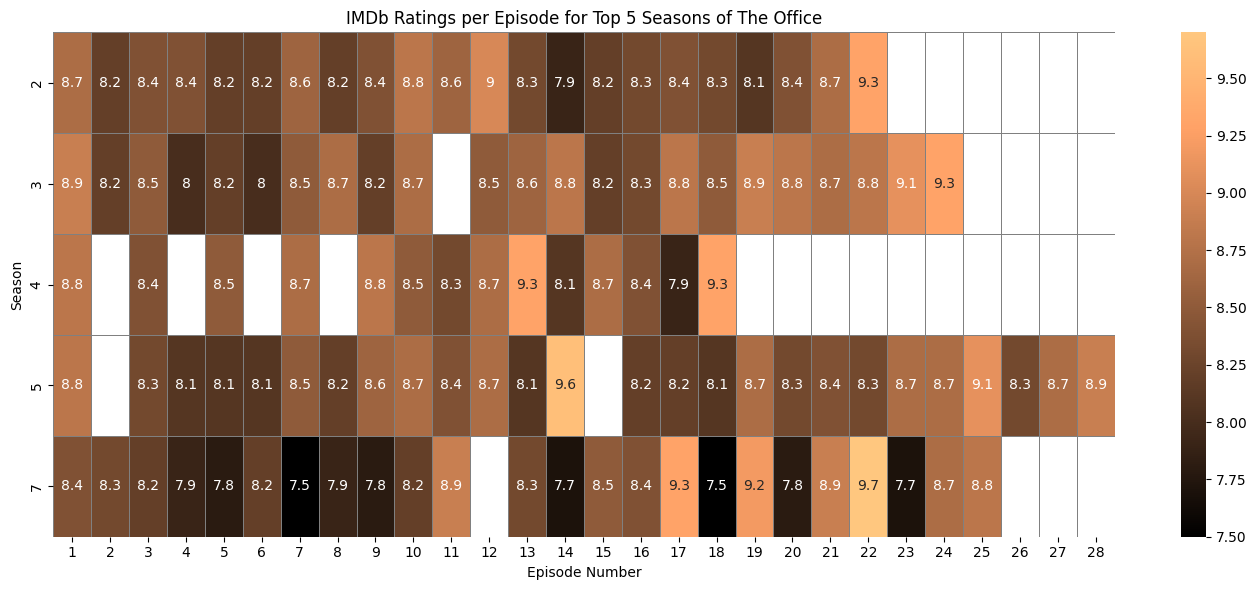

In [ ]:
office_df

top_episodes_agg = top_episodes.groupby(["season", "episode"])["imdb_rating"].mean().reset_index()

top_episodes_agg = top_episodes_agg.sort_values(by=["season", "episode"])

heatmap_data = top_episodes_agg.pivot(index="season", columns="episode", values="imdb_rating")

plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="copper",
    linewidths=0.5,
    linecolor='gray'
)
plt.title("IMDb Ratings per Episode for Top 5 Seasons of The Office")
plt.xlabel("Episode Number")
plt.ylabel("Season")
plt.tight_layout()
plt.show()

# this heatmap here shows IMDb Ratings per Episode for Top 5 Seasons. Darker gradients = lower SCORE - Lighter Gradients = Higher SCORE

# INSTALLS AND IMPLEMENTING KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors
!pip install scikit-learn

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import *

In [ ]:
url = "https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv"

office_df = pd.read_csv(url)

In [ ]:
features = office_df[['season', 'episode', 'imdb_rating']]
labels = office_df['sentimentr_score']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)

In [ ]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
pred = model.predict(X_test)

In [ ]:
sentiment_range = office_df.groupby(['season', 'episode'])['sentimentr_score'].agg(lambda x: x.max() - x.min())

sentiment_range = sentiment_range.reset_index().sort_values(by='sentimentr_score', ascending=False)

print(sentiment_range.head(10))


     season  episode  sentimentr_score
50        3       24          3.944789
64        4       18          3.621709
167       9        5          3.249490
152       8       14          3.080880
155       8       17          3.031089
9         2        4          3.000000
85        5       23          2.922639
185       9       24          2.886751
111       6       23          2.796084
15        2       10          2.721688


# Part 2



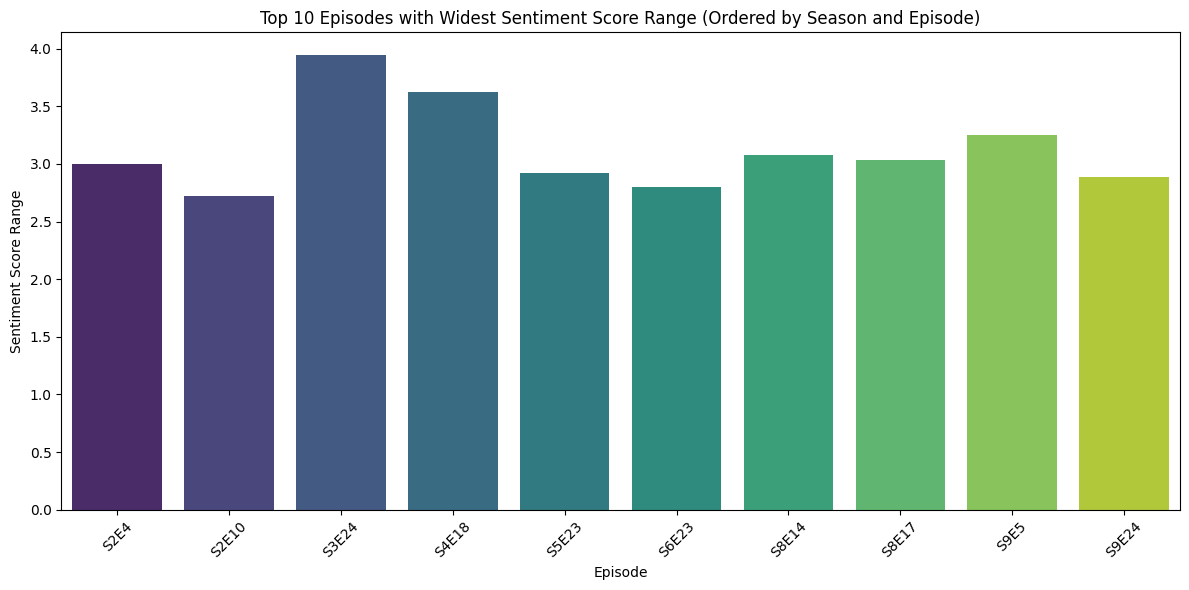

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sorted_df = sentiment_range.head(10).sort_values(['season', 'episode'])

sorted_df['episode_label'] = 'S' + sorted_df['season'].astype(str) + 'E' + sorted_df['episode'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_df, x='episode_label', y='sentimentr_score', palette='viridis')

plt.title('Top 10 Episodes with Widest Sentiment Score Range (Ordered by Season and Episode)')
plt.xlabel('Episode')
plt.ylabel('Sentiment Score Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
